<a href="https://colab.research.google.com/github/Chaos-6/azure-intelligent-edge-patterns/blob/master/DSA_milestone_project_2_KEY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bird Tracking:
##Milestone Project 2
Instructor Key

**Instructions**

For the second milestone project you will be creating a dashboard that displays information about bird migration routes. 

This project will be split into three 
parts:

> **Part 1:** SQL and Databases

> **Part 2:** Data Wrangling

> **Part 3:** Visualizations

**Required Tools:** Google Colab, MySQL Workbench










**Background**

*Wings 4 Life* is a bird refuge organization that helps bird watchers plan bird watching trips along migration routes along the southwestern coast of Europe and northwestern coast of Africa. 

They provide three different travel packages for tourists to choose from based on the locations they wish to visit and the types of birds they would like to see.

You will select **one** travel package to create a dashboard for. The steps for part 1 and 2 are the same for all travel packages.

**The French Traveler**
*   Only visit locations within France
* Prefers high-speed bird sightings
* Prefers early morning bird watching
* Not willing to bird watch during cold winter months

**The Retirement Getaway**
* Willing to visit any location excluding the desert (it's too hot!)
*Prefers birds that fly at low altitudes
* Prefers to travel in the spring months
* Locations with mild weather (60s- 70s)

**The Hitchhiker**
* Willing to visit any location
*Prefers birds that fly at low altitudes
*Requests special focus on locations in the western Sahara Desert
*Avoid danger zone temperatures (110+)

# **Part 1: SQL and Databases**

We will be using MySQL Workbench to create the final dataset that will be used to create the dashboard.

The two datasets we will be working with are:

>*city_weather.sql*

>*bird_data.sql*

The first dataset contains the average daily temperature of the major cities the birds pass during their migration route. The second dataset contains information about the birds.


**Step 1: Open MySQL Workbench**

Open a new instance of MySQL Workbench on your computer. We need to create a new schema for this project. In a new query tab, run the following code.



```
CREATE SCHEMA milestone_project2
```



Remember, to see your new schema in the schema navigator, you will need to refresh the navigator.  **Make sure to highlight the name of the new schema so the new tables will be created in it.**

**Step 2: Create Tables**

The scripts to create the tables for you have already been created. To upload the script navigate to File > Open SQL script

Run *city_weather.sql* and *bird_data.sql*


**Step 3: View Tables**

Write a query that returns the first 5 rows of the *city_weather* table. Copy your query below.

**Step 3 Answer:**

```
SELECT * FROM city_weather LIMIT 5;
```

**Step 4: View Tables**

Write a query that returs the first 5 rows of the *bird_data* table. Copy your query below.

**Step 4 Answer:**
```
SELECT * FROM bird_data LIMIT 5;
```

**Step 5: Joining Tables**

We need to join the *bird_data* and *city_weather* tables to create a table with the following columns.

* id 
* altitude 
* date_time 
* device_info 
* direction 
* latitude 
* longitude 
* nearest_city 
* country 
* avg_temp 

Look closely at the first 5 observations of each table. Which **two** features will we need to merge on to join the two tables? 



**Step 5 Answer:**

Date and city



**Step 6: Joining Tables Continued**

What are the names of the columns in the *bird_data* table that can be used for the join?  What are the corresponding column names in *city_weather*?

**Step 6 Answer:**

In *bird_data* the correct date column is named "date" and the city column is named "nearest_city".

In *city_weather* the date column is named "DATE" and the city column is named "CITY".

**Step 7: Joining Tables Continued**

We want to merge *bird_data* on the left and *city_weather* on the right so that every element of *bird_data* is included in the results regardless of whether it appears in *city_weather*.  What type of join is this?

**Step 7 Answer:**

A left outer join.

**Step 8:**


Click on "Query" in the MySQL Workbench menu.  Select "Limit Rows" and then "Don't Limit".

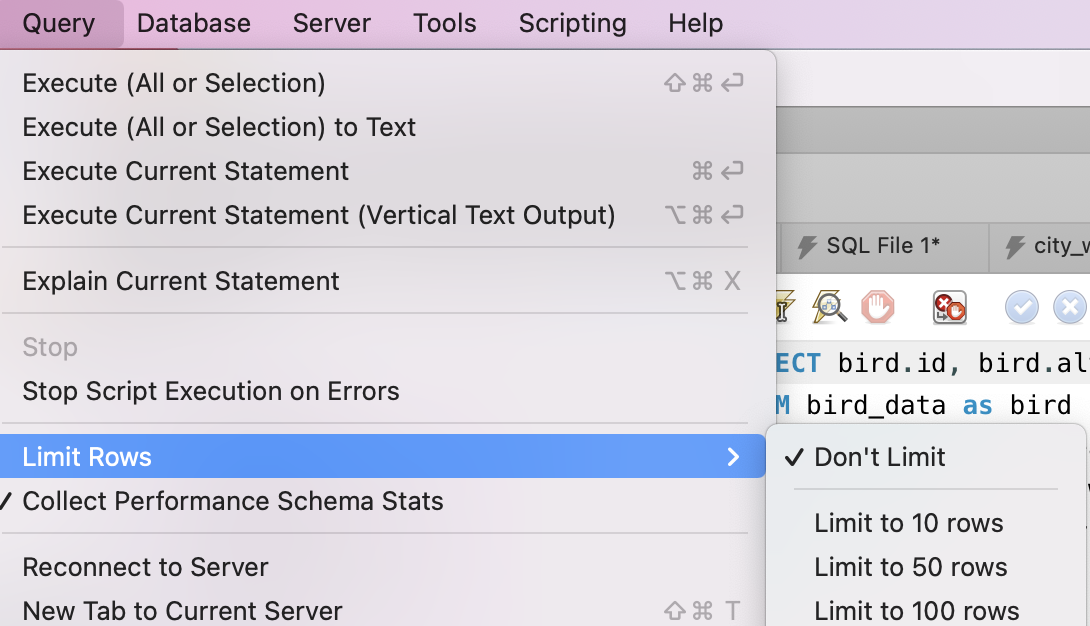

From: ThriveDX

**Step 9: Joining Tables Continued**

Join the two tables with *bird_data* aliased as *bird* and *city_weather* aliased as *city*.

Select only the following columns:

* id 
* altitude 
* date_time 
* device_info 
* direction 
* latitude 
* longitude 
* nearest_city 
* country 
* avg_temp 

Order the results by id.

Copy your query below.



**Step 9 Answer:**

```
SELECT bird.id, bird.altitude, bird.date_time, bird.device_info_serial, bird.direction, bird.latitude, bird.longitude, bird.speed_2d, bird.bird_name, bird.nearest_city, bird.country, weather.avg_temp
FROM bird_data as bird
LEFT OUTER JOIN city_weather as weather
ON bird.nearest_city = weather.CITY
AND bird.date = weather.DATE
ORDER BY bird.ID
```




**Step 10: Export the table**

In the top center of the query results, click the "Export" button

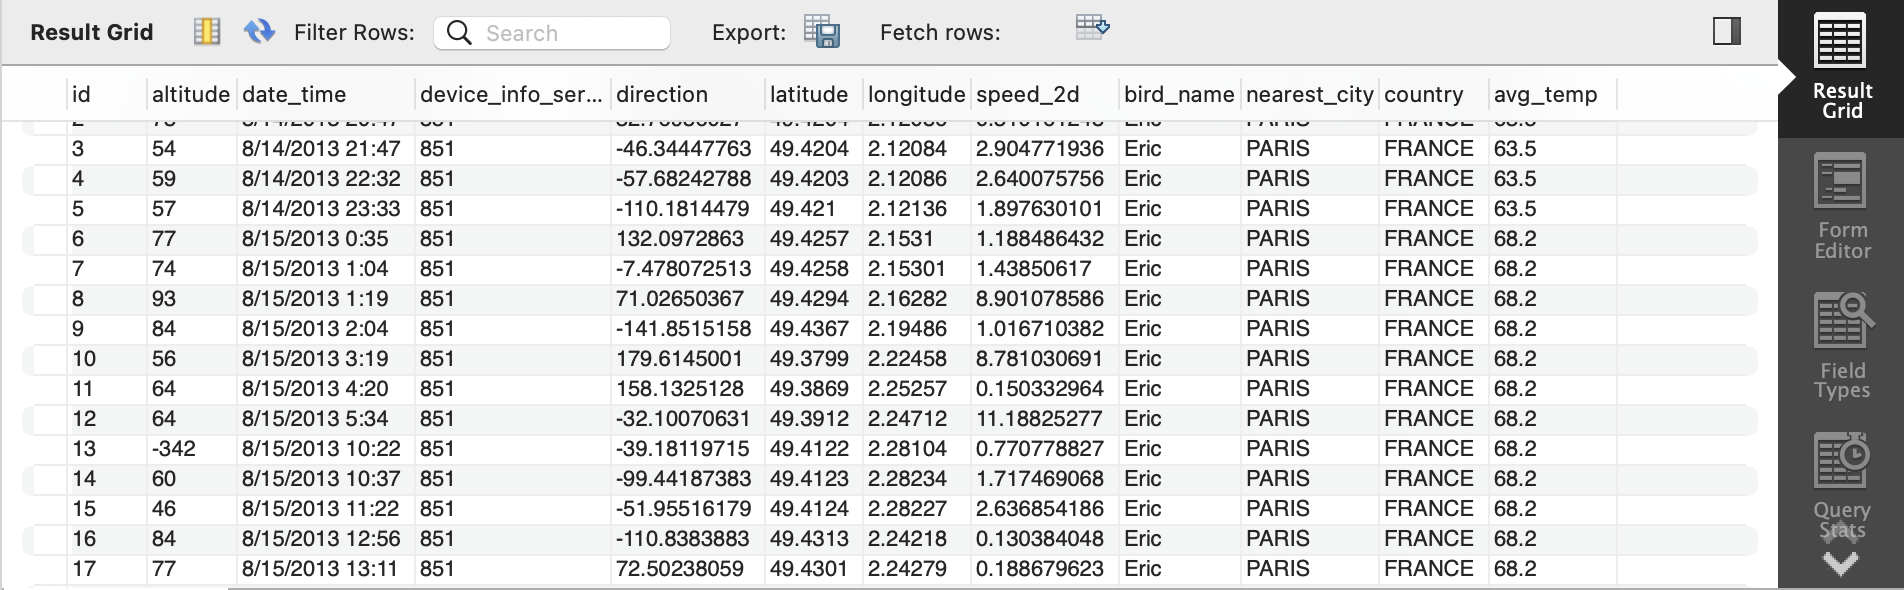

From: ThriveDX



**Step 11: Export the Table Continued**

Save the exported table as a csv file named **bird_tracking.csv**.  Save it to your computer in a place that's easy to find.

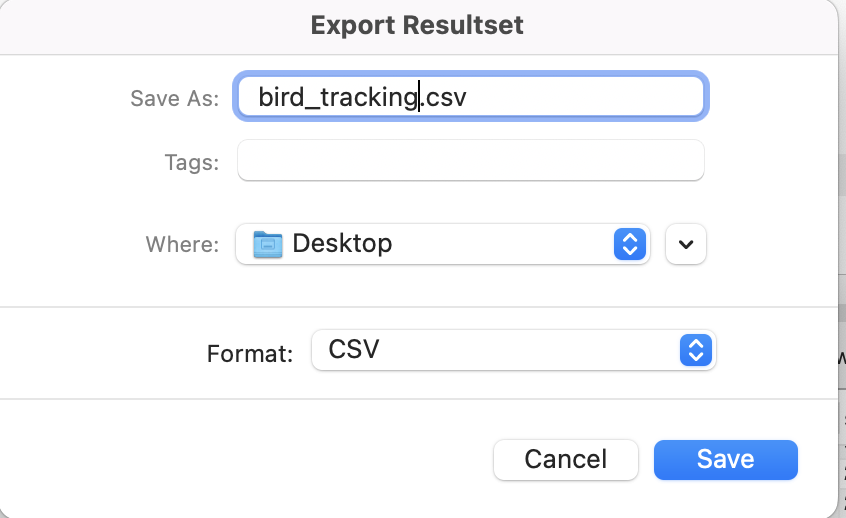

From: ThriveDX

# **Part 2: Data Wrangling**

You will be continuing to work through the bird migration dataset through various regions around the world. In this section of the milestone project, you will be required to exercise your data wrangling skills in Python. 

Complete each step to get you prepared for the visualization portion in part 3. 

Upload the *bird_tracking.csv* you exported in Part 1 to your Google Colab files in order to use it in Part 2 of the project.

**Step 1: Import the necessary libraries for this project.**

You will need to import the following libraries for this portion of the milestone project:          
* Pandas
* Numpy

In [ ]:
#Step 1 Answer:

import pandas as pd
import numpy as np

**Step 2: Read in the dataset to a dataframe.**

Now that you have completed the first portion of the milestone project in SQL, read in your updated dataset (bird_trackig.csv) into a dataframe below. Name the dataframe `birds_df`.  Print the dataframe to ensure the data was read in correctly.

In [ ]:
#Step 2 Answer:

birds_df = pd.read_csv('bird_tracking.csv')


birds_df

,id,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,nearest_city,country,avg_temp
0,1,71,8/14/2013 19:18,851,-150.469753,49.4199,2.12073,0.150000,Eric,PARIS,FRANCE,63.5
1,2,73,8/14/2013 20:47,851,32.769360,49.4204,2.12086,0.310161,Eric,PARIS,FRANCE,63.5
2,3,54,8/14/2013 21:47,851,-46.344478,49.4204,2.12084,2.904772,Eric,PARIS,FRANCE,63.5
3,4,59,8/14/2013 22:32,851,-57.682428,49.4203,2.12086,2.640076,Eric,PARIS,FRANCE,63.5
4,5,57,8/14/2013 23:33,851,-110.181448,49.4210,2.12136,1.897630,Eric,PARIS,FRANCE,63.5
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9999,8,4/30/2014 15:29,833,17.675638,51.3525,3.17716,0.419762,Sanne,BRUSSELS,BELGIUM,54.8
9995,9999,-10,4/30/2014 16:29,833,-10.057916,51.3527,3.17712,5.531148,Sanne,BRUSSELS,BELGIUM,54.8
9996,9999,11,4/30/2014 17:00,833,45.448157,51.3526,3.17715,0.208087,Sanne,BRUSSELS,BELGIUM,54.8
9997,9999,16,4/30/2014 18:29,833,88.376373,51.3546,3.18151,0.592115,Sanne,BRUSSELS,BELGIUM,54.8


**Step 3: Detect missing data (if any).**

As you know, we cannot complete an accurate analysis with missing or incorrect data. Let's take care of those issues now by working to determine if there are any errors within our dataset. You might have noticed some of these errors while working in the SQL portion of this project. 

Use the `isnull().sum()` function to get the number of missing cells in each column.

Drop any records with missing data with `.dropna(inplace=True)`

In [ ]:
#Step 3 Answer:

birds_df.isnull().sum()

birds_df.dropna(inplace=True)

**Step 4: Duplicates**

Check for duplicated rows using `.duplicated().sum()` and drop any that are missing using `.drop_duplicates()`.

In [ ]:
#Step 4 Answer:

birds_df.duplicated().sum()



0

**Step 5: Perform basic exploratory data analysis.**

You should already be somewhat familiar with the bird_tracking.csv dataset from Part 1 of the milestone project. Perform basic EDA using:
* `.dtypes()`
* `.describe()`

In [ ]:
#Step 5 Answer:

print(birds_df.dtypes)

birds_df.describe()

id                      int64
altitude                int64
date_time              object
device_info_serial      int64
direction             float64
latitude              float64
longitude             float64
speed_2d              float64
bird_name              object
nearest_city           object
country                object
avg_temp              float64
dtype: object


,id,altitude,device_info_serial,direction,latitude,longitude,speed_2d,avg_temp
count,9999.000000,9999.000000,9999.000000,9930.000000,9999.000000,9999.000000,9930.000000,9999.000000
mean,5001.702170,51.254725,849.368737,-6.298123,30.438638,-8.821899,2.527014,64.139594
std,2889.516865,131.636630,12.794979,102.741537,14.853157,8.517500,3.571868,16.343327
min,1.000000,-668.000000,833.000000,-179.985721,12.358400,-17.624600,0.000000,-99.000000
25%,2500.500000,2.000000,833.000000,-91.342204,15.544900,-16.758150,0.402150,55.700000
50%,5000.000000,14.000000,851.000000,-12.185866,30.428600,-9.652730,1.192434,65.500000
75%,7499.500000,87.000000,864.000000,80.327169,50.034400,2.620295,2.994178,71.800000
max,9999.000000,5448.000000,864.000000,180.000000,51.514300,4.853160,63.488066,92.800000


**Step 6: EDA for categorical features**

Note that `.describe()` doesn't give basic descriptive statistics for categorical features by default.  Use `.value_counts()` to find the frequency of each `bird_name` and `nearest_city`.

Most observations in the dataset were nearest to which city?



In [ ]:
#Step 6 Answer:

print(birds_df[["bird_name"]].value_counts())

birds_df[["nearest_city"]].value_counts()

bird_name
Nico         3382
Sanne        3326
Eric         3222
dtype: int64


nearest_city
DAKAR           2957
RABAT           2022
PARIS           1554
BRUSSELS        1461
NOUAKCHOTT      1274
BISSAU           247
LISBON           182
BANJUL           108
BILBAO            66
BORDEAUX          59
dtype: int64

**Step 6 Answer**

Dakar


**Step 7: Average temperature**

Three types of potential tourist were identified at the beginning of the project.  All of them had concerns about weather being too hot or too cold.

Find the average temperature for each country in the dataset.

*Hint: Follow these next steps to find the average temperature for each country.*
* Create a new DataFrame with the columns `country` and `avg_temp`
* Use the `.groupby()` function for the country
* Add the aggregate function `.mean()` to the end of your  `.groupby()` statement to calculate the average temperature

Which country has the warmest average temperature?  Which country has the coolest average temperature?

In [ ]:
#Step 7 Answer:

temp = birds_df[["country", "avg_temp"]]
temp.groupby("country").mean()

,avg_temp
country,
BELGIUM,56.395277
FRANCE,59.940112
GAMBIA,76.791667
GUINEA-BISSAU,82.254656
MAURITANIA,74.682653
MOROCCO,54.694065
PORTUGAL,65.350000
SENEGAL,70.208894
SPAIN,58.148485


**Step 7 Answer:**

Morocco has the coolest average temperature and Guinea-Bissau has the warmest average temperature.

**Step 8: Drop, Rename, and Replace**

Moving forward for our analysis, there are a few columns we don't need, as well as columns that will need to be more specific. 

* Drop the `id`, `device_info_serial`, `direction`, and `nearest_city` columns 
* Rename `speed_2d` to speed

Print the DataFrame to confirm that your changes were successful.  If your changes don't persist, make sure you are usign `inplace=True`.

In [ ]:
#Step 8:

birds_df.drop(labels=['id', 'device_info_serial', 'nearest_city'], inplace=True, axis=1)

birds_df.rename(columns = {'speed_2d': 'speed'}, inplace= True)

birds_df

,altitude,date_time,direction,latitude,longitude,speed,bird_name,country,avg_temp
0,71,8/14/2013 19:18,-150.469753,49.4199,2.12073,0.150000,Eric,FRANCE,63.5
1,73,8/14/2013 20:47,32.769360,49.4204,2.12086,0.310161,Eric,FRANCE,63.5
2,54,8/14/2013 21:47,-46.344478,49.4204,2.12084,2.904772,Eric,FRANCE,63.5
3,59,8/14/2013 22:32,-57.682428,49.4203,2.12086,2.640076,Eric,FRANCE,63.5
4,57,8/14/2013 23:33,-110.181448,49.4210,2.12136,1.897630,Eric,FRANCE,63.5
...,...,...,...,...,...,...,...,...,...
9994,8,4/30/2014 15:29,17.675638,51.3525,3.17716,0.419762,Sanne,BELGIUM,54.8
9995,-10,4/30/2014 16:29,-10.057916,51.3527,3.17712,5.531148,Sanne,BELGIUM,54.8
9996,11,4/30/2014 17:00,45.448157,51.3526,3.17715,0.208087,Sanne,BELGIUM,54.8
9997,16,4/30/2014 18:29,88.376373,51.3546,3.18151,0.592115,Sanne,BELGIUM,54.8


**Step 9: Data Export**

Congratulations! You have made it to the end of Part 2 of the milestone project. Next, you will use this dataset to create visualizations and personalized dashboards for a variety of users!

Let's export our dataframe to a new CSV file that we will use in the final part of the milestone project.  Run the following code block to export the data.

In [ ]:
#Step 9

birds_df.to_csv('bird_data_clean.csv')

You should be able to download bird_data_clean.csv file from the Google Colab files.

# **Part 3: Visual Communications**

**Step 1: Install & import libraries**

In [ ]:
# install geo libraries
!pip install geopandas
!pip install contextily

     |████████████████████████████████| 1.0 MB 8.7 MB/s 
     |████████████████████████████████| 6.3 MB 42.2 MB/s 
     |████████████████████████████████| 16.7 MB 45.5 MB/s 
     |████████████████████████████████| 19.3 MB 5.6 MB/s 


In [ ]:
# import all libraries
import contextily as ctx
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, Polygon

**Step 2: Create subset and create data frames**

In [ ]:
# Read the bird tracking dataset, add to a data frame (pandas)
birds_df_map = birds_df[['date_time','latitude','longitude','speed','bird_name']]
# View the first 5 lines of the data frame, to confirm success
birds_df_map.head()

,date_time,latitude,longitude,speed,bird_name
0,8/30/2013 15:39,50.3662,3.02472,1.230163,Eric
1,8/30/2013 19:53,50.3666,3.02500,0.433820,Eric
2,8/31/2013 0:09,50.3026,2.89092,8.000625,Eric
3,8/31/2013 0:39,50.2704,2.84267,0.715681,Eric
4,8/31/2013 0:54,50.2714,2.84371,0.492037,Eric


In [ ]:
# Designate the right coordinate system (maps can be drawn differently)
crs = 'epsg:4326'

# Will take the lat and long and put into list of single points
geometry = [Point(xy) for xy in zip(birds_df_map['longitude'], birds_df_map['latitude'])]

# Create GeoPandas dataframe (adds our bird tracking data frame)
geo_df = gpd.GeoDataFrame(birds_df_map, crs = crs, geometry = geometry)

**Step 3: Create Map**

Now that we have our data frames created,let's create the components for our map


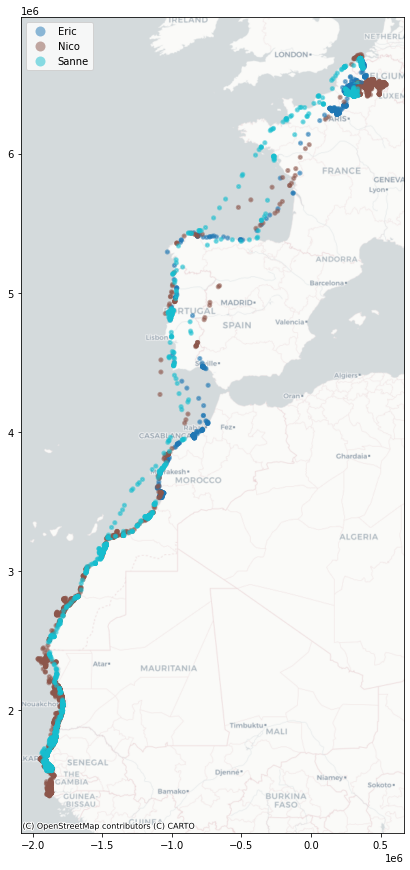

In [ ]:
# Create figure and map axes, assign to subplot
# This sets the size of your display map
fig, ax = plt.subplots(figsize=(15, 15))

# SPECIFY MAP COORDINATES AND FORMATTING (geopandas)
# column - assign bird_name as coordinates on map
# ax - the axes
# alpha - set the map transparency
# legend - add a legend
# markersize - adjust size of points

map = geo_df.to_crs('epsg:3857').plot(column='bird_name', linewidth=2, ax=ax, alpha=0.5, legend=True, markersize=10)
ctx.add_basemap(map, source=ctx.providers.CartoDB.Positron)

**Step 4: Export Map**

Now that you have your map created, you have options on what to do with it. Should you export it as a shapefile, geojson file, geopackage, or image? They all have different purposes. 

* You'll want to interact with the map to see its creation, so save it as a geojson file. A geojson file looks like a regular JSON file and has all data in our dataset, but contains coordinate information we added to this script, such as the column we use as our points (bird name).

* You'll need a PNG file of the map for your dashboard.

In [ ]:
# Save as png
fig.savefig('bird-sightings-map.png', dpi=300)

# Write to file (can be viewed by uploading to https://geojson.in/)
geo_df.to_file("bird_tracker.geojson", driver='GeoJSON')

# **Travel Packages**

Each bird watching travel pcackage contains specific data requirements.

For the final portion of the project you will create a chart for **one** of the travel packages.

Recall the three options are:

**The French Traveler**
*   Only visit locations within France
* Prefers high-speed bird sightings
* Prefers early morning bird watching
* Not willing to bird watch during cold winter months

**The Retirement Getaway**
* Willing to visit any location excluding the desert (it's too hot!)
*Prefers birds that fly at low altitudes
* Prefers to travel in the spring months
* Locations with mild weather (60s- 70s)

**The Hitchhiker**
* Willing to visit any location
*Prefers birds that fly at low altitudes
*Requests special focus on locations in the western Sahara Desert
*Avoid danger zone temperatures (110+)



# **The French Traveler**
Only complete the section if you have chosen the French Traveler option.

In [ ]:
# Create a new dataframe
french_df = birds_df[['date_time','latitude','longitude','country','speed','bird_name']]

# Filter the dataset for only locations in France
french_df = french_df.query("country=='FRANCE'")

# Let's peak at our data to see how the results are sorted
french_df.head()

,date_time,latitude,longitude,country,speed,bird_name
103,11/15/2013 8:24,48.7796,0.562392,FRANCE,19.472660,Eric
104,11/15/2013 9:39,48.1936,-0.180361,FRANCE,16.381700,Eric
105,11/15/2013 10:25,47.8116,-0.678460,FRANCE,23.178529,Eric
106,11/15/2013 12:56,46.2730,-1.985450,FRANCE,18.648351,Eric
138,4/4/2014 8:53,45.6010,-1.155330,FRANCE,0.497695,Eric


Text(0.5, 1.0, 'Bird Sightings in France')

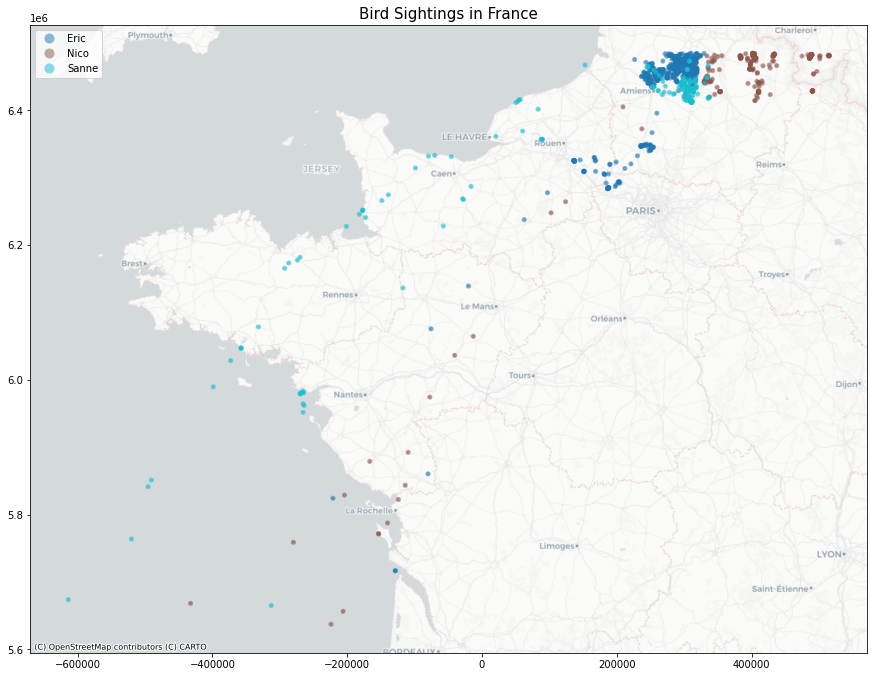

In [ ]:
# Designate the right coordinate system (maps can be drawn differently)
crs = 'EPSG:4326'

# Takes the lat and long from our bird sightings, puts into list of single points (shapely)
geometry = [Point(xy) for xy in zip(french_df['longitude'], french_df['latitude'])]

# Create GeoPandas dataframe (includes our France bird tracking data frame)
geo_df = gpd.GeoDataFrame(french_df, crs = crs, geometry = geometry)

# Create figure and map axes, assign to subplot (matplotlib)
fig, ax = plt.subplots(figsize=(15, 15))

# Specify France map coordinates and add more formatting
map_france = geo_df.to_crs('EPSG:3857').plot(column='bird_name', linewidth=2, ax=ax, alpha=0.5, legend=True, markersize=10)
ctx.add_basemap(map_france, source=ctx.providers.CartoDB.Positron)

# Add title to map
plt.title('Bird Sightings in France', fontsize=15)

##### **Plot the fastest bird speeds**

In [ ]:
# Sort for top 10 fastest bird sightings
top_fastest_df = french_df.sort_values(by='speed', ascending=False).iloc[:10:]
top_fastest_df.head(10)

,date_time,latitude,longitude,country,speed,bird_name,geometry
1076,11/15/2013 15:48,45.8661,-2.514120,FRANCE,25.959145,Nico,POINT (-2.51412 45.86610)
1074,11/15/2013 14:17,46.6119,-1.495450,FRANCE,24.058364,Nico,POINT (-1.49545 46.61190)
1077,11/15/2013 17:18,45.2962,-3.884590,FRANCE,23.825083,Nico,POINT (-3.88459 45.29620)
105,11/15/2013 10:25,47.8116,-0.678460,FRANCE,23.178529,Eric,POINT (-0.67846 47.81160)
3159,11/15/2013 8:59,49.5715,2.131430,FRANCE,21.392522,Nico,POINT (2.13143 49.57150)
1072,11/15/2013 10:30,48.8401,0.920845,FRANCE,20.683520,Nico,POINT (0.92085 48.84010)
103,11/15/2013 8:24,48.7796,0.562392,FRANCE,19.472660,Eric,POINT (0.56239 48.77960)
1852,9/11/2013 1:38,50.1293,2.592270,FRANCE,18.818884,Eric,POINT (2.59227 50.12930)
106,11/15/2013 12:56,46.2730,-1.985450,FRANCE,18.648351,Eric,POINT (-1.98545 46.27300)
2528,11/11/2013 10:52,49.0521,1.674710,FRANCE,18.176416,Eric,POINT (1.67471 49.05210)


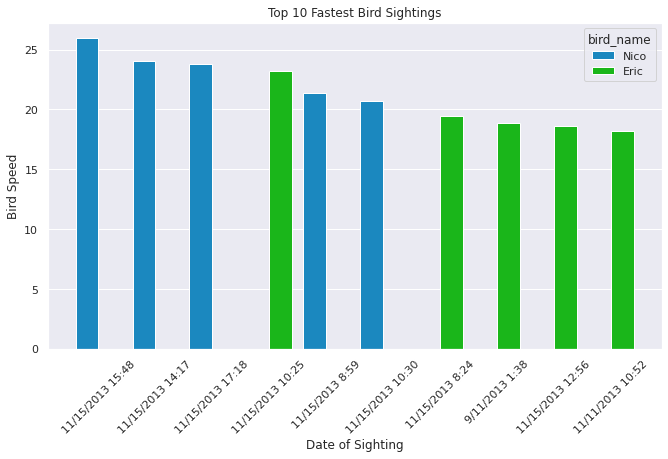

In [ ]:
# Create custom colors
bird_colors = ['#0091da', '#00d000', '#aa5500']
# Set color palette
custom_colors = sns.color_palette(bird_colors, 3)
# Adjust width/length of graph
sns.set(rc={"figure.figsize":(11, 6)}) 

# Plot scatterplot
# x are the column values
# y are the row values
# data is our dataframe
# hue is the column you want to see color in, e.g. we want our bird names to be different colors
# ci removes little error marks that appear by default (don't worry about this)
ax = sns.barplot(x='date_time', y='speed', data=top_fastest_df, hue='bird_name', palette=custom_colors, ci=None)

# Customize axes and title
ax.set_title('Top 10 Fastest Bird Sightings')
ax.set_xlabel('Date of Sighting')
ax.set_ylabel('Bird Speed')
# Adjust angle of x-axis labels to be more readable
plt.xticks(rotation=45)

# Adds a margin around the bar plot
plt.margins(0.05)
# Show the plot
plt.show()

**Where are the fastest bird sightings in France?**

Now that we have the dataset filtered to include the 10 fastest birds in France, let's see where these sightings are and when (date) on a map.

Text(0.5, 1.0, 'Top 5 fastest bird sightings in France')

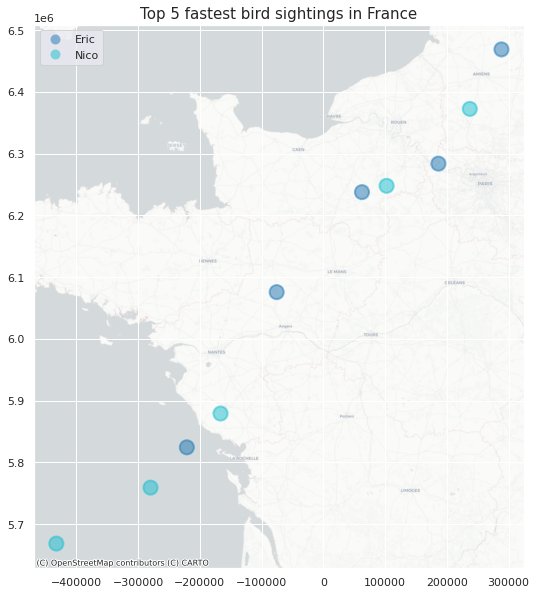

In [ ]:
# Takes the lat and long from our bird sightings, puts into list of single points (shapefly)
geometry = [Point(xy) for xy in zip(top_fastest_df['longitude'], top_fastest_df['latitude'])]

# Create GeoPandas dataframe (includes our France bird tracking data frame)
geo_df_france = gpd.GeoDataFrame(top_fastest_df, crs = crs, geometry = geometry)

# Create figure and map axes, assign to subplot (matplotlib)
fig, ax = plt.subplots(figsize=(10, 10))

# Specify France map coordinates and add more formatting
map_france = geo_df_france.to_crs('EPSG:3857').plot(column='bird_name', linewidth=2, ax=ax, alpha=0.5, legend=True, markersize=200)
ctx.add_basemap(map_france, source=ctx.providers.CartoDB.Positron)

# Add title to map
plt.title('Top 10 fastest bird sightings in France', fontsize=15)


Since this map is not interactive, let's save this map as a GeoJSON file and view it in https://geojson.in/.

In [ ]:
# Write to file 
geo_df_france.to_file("bird_tracker_france.geojson", driver='GeoJSON')

Great! Now tourists who choose the French Traveler package know which parts of France they should travel to for the best bird watching.

# **The Retirement Getaway**
Only complete the section if you have chosen the Retirement Getaway option.

In [ ]:
# Create a new dataframe
retire_df = birds_df[['date_time','avg_temp','altitude','latitude','longitude','country','speed','bird_name']]

# Filter the dataset for birds that fly at low altitudes
retire_df = retire_df.query('altitude < 500')

#Filter the dataset for sightings at temperatures between 60-70 degrees.
retire_df = retire_df.query('60 < avg_temp < 70')

# Let's peak at our data to see how the results are sorted
retire_df.head()

,date_time,avg_temp,altitude,latitude,longitude,country,speed,bird_name
0,8/30/2013 15:39,63.1,55,50.3662,3.02472,BELGIUM,1.230163,Eric
1,8/30/2013 19:53,63.1,54,50.3666,3.02500,BELGIUM,0.433820,Eric
2,8/31/2013 0:09,62.8,107,50.3026,2.89092,BELGIUM,8.000625,Eric
3,8/31/2013 0:39,62.8,85,50.2704,2.84267,BELGIUM,0.715681,Eric
4,8/31/2013 0:54,62.8,88,50.2714,2.84371,BELGIUM,0.492037,Eric


Text(0.5, 1.0, 'Bird Sightings for the Retired Traveler')

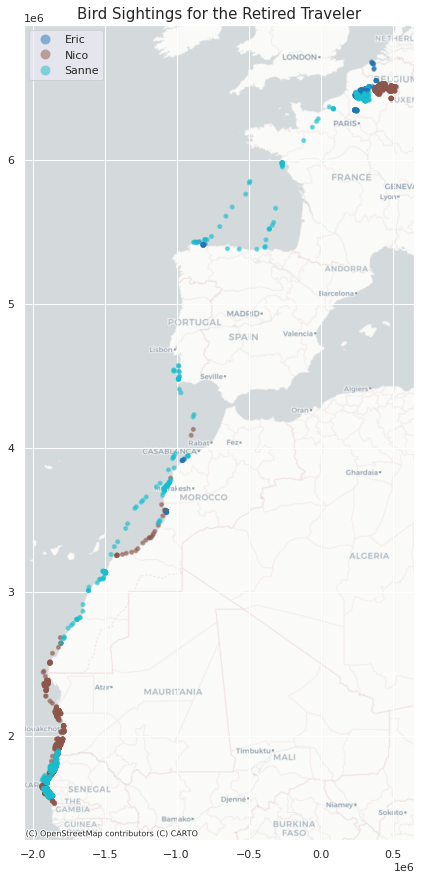

In [ ]:
# Designate the right coordinate system (maps can be drawn differently)
crs = 'EPSG:4326'

# Takes the lat and long from our bird sightings, puts into list of single points (shapely)
geometry = [Point(xy) for xy in zip(retire_df['longitude'], retire_df['latitude'])]

# Create GeoPandas dataframe (includes our retirement bird tracking data frame)
geo_df = gpd.GeoDataFrame(retire_df, crs = crs, geometry = geometry)

# Create figure and map axes, assign to subplot (matplotlib)
fig, ax = plt.subplots(figsize=(15, 15))

# Specify retirement map coordinates and add more formatting
map_retire = geo_df.to_crs('EPSG:3857').plot(column='bird_name', linewidth=2, ax=ax, alpha=0.5, legend=True, markersize=10)
ctx.add_basemap(map_retire, source=ctx.providers.CartoDB.Positron)

# Add title to map
plt.title('Bird Sightings for the Retired Traveler', fontsize=15)


##### **Plot the lowest bird sighting altitudes**

*(note: negative numbers indicate altitudes below sea level)*

In [ ]:
# Sort for top 10 lowest altitude bird sightings
lowest_altitude_df = retire_df.sort_values(by='altitude', ascending=True).iloc[:10:]
lowest_altitude_df.head(10)

,date_time,avg_temp,altitude,latitude,longitude,country,speed,bird_name,geometry
9472,3/8/2014 7:57,67.1,-580,30.4391,-9.64732,MOROCCO,1.155206,Eric,POINT (-9.64732 30.43910)
6487,12/31/2013 11:20,68.1,-561,14.1355,-16.80950,SENEGAL,1.160689,Sanne,POINT (-16.80950 14.13550)
6672,1/17/2014 11:03,68.9,-446,14.1337,-16.81480,SENEGAL,3.827806,Sanne,POINT (-16.81480 14.13370)
2024,9/22/2013 6:31,63.1,-383,50.0482,2.44983,FRANCE,1.964612,Eric,POINT (2.44983 50.04820)
2124,9/30/2013 6:20,60.3,-375,49.9799,2.84334,FRANCE,1.756018,Eric,POINT (2.84334 49.97990)
2123,9/30/2013 6:05,60.3,-363,49.9820,2.84257,FRANCE,0.571402,Eric,POINT (2.84257 49.98200)
4585,3/12/2014 7:02,65.5,-350,14.1273,-16.81850,SENEGAL,3.666074,Nico,POINT (-16.81850 14.12730)
1530,8/15/2013 10:22,68.2,-342,49.4122,2.28104,FRANCE,0.770779,Eric,POINT (2.28104 49.41220)
7046,2/15/2014 8:15,66.7,-329,14.9202,-17.12620,SENEGAL,2.008233,Sanne,POINT (-17.12620 14.92020)
2047,9/23/2013 14:06,64.4,-327,50.1935,2.73506,FRANCE,4.190048,Eric,POINT (2.73506 50.19350)


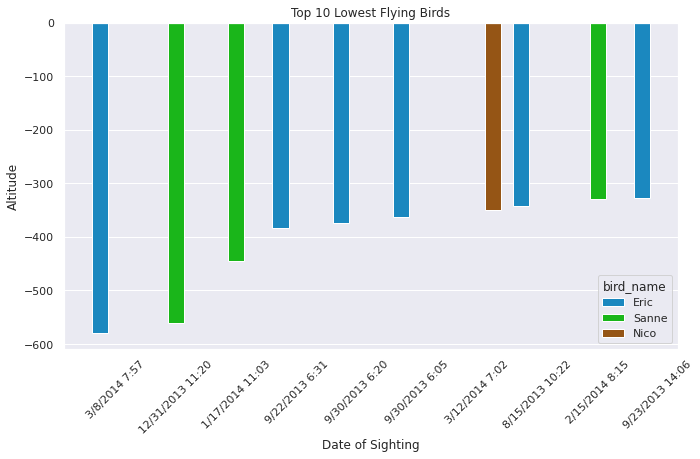

In [ ]:
# Create custom colors
bird_colors = ['#0091da', '#00d000', '#aa5500']
# Set color palette
custom_colors = sns.color_palette(bird_colors, 3)
# Adjust width/length of graph
sns.set(rc={"figure.figsize":(11, 6)}) 

# Plot scatterplot
# x are the column values
# y are the row values
# data is our dataframe
# hue is the column you want to see color in, e.g. we want our bird names to be different colors
# ci removes little error marks that appear by default (don't worry about this)
ax = sns.barplot(x='date_time', y='altitude', data=lowest_altitude_df, hue='bird_name', palette=custom_colors, ci=None)

# Customize axes and title
ax.set_title('Top 10 Lowest Flying Birds')
ax.set_xlabel('Date of Sighting')
ax.set_ylabel('Altitude')
# Adjust angle of x-axis labels to be more readable
plt.xticks(rotation=45)

# Adds a margin around the bar plot
plt.margins(0.05)
# Show the plot
plt.show()

**Where are the lowest bird sightings on the map?**

Now that we have the dataset filtered to include the 10 lowest flying birds, let's see where these sightings are and when (date) on a map.

Text(0.5, 1.0, 'Lowest Altitude Bird Sightings')

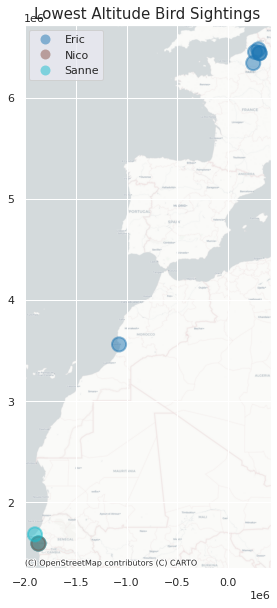

In [ ]:
# Takes the lat and long from our bird sightings, puts into list of single points (shapefly)
geometry = [Point(xy) for xy in zip(lowest_altitude_df['longitude'], lowest_altitude_df['latitude'])]

# Create GeoPandas dataframe (includes our retirement bird tracking data frame)
geo_df_retire = gpd.GeoDataFrame(lowest_altitude_df, crs = crs, geometry = geometry)

# Create figure and map axes, assign to subplot (matplotlib)
fig, ax = plt.subplots(figsize=(10, 10))

# Specify France map coordinates and add more formatting
map_retire = geo_df_retire.to_crs('EPSG:3857').plot(column='bird_name', linewidth=2, ax=ax, alpha=0.5, legend=True, markersize=200)
ctx.add_basemap(map_retire, source=ctx.providers.CartoDB.Positron)

# Add title to map
plt.title('Lowest Altitude Bird Sightings', fontsize=15)

Since this map is not interactive, let's save this map as a GeoJSON file and view it in https://geojson.in/.

In [ ]:
# Write to file 
geo_df_france.to_file("bird_tracker_france.geojson", driver='GeoJSON')

Great! Now tourists who choose the Retirement Getaway package know which areas they should travel to for the best bird watching.

# **The Hitchhiker**
Only complete the section if you have chosen the Hitchhiker option.

In [ ]:
# Create a new dataframe
hike_df = birds_df[['date_time','altitude','latitude','longitude','country','speed','bird_name']]

# Filter the dataset for birds that fly at low altitudes
hike_df = hike_df.query('altitude < 500')

# Filter the dataset for locations in Sahara desert
hike_df = hike_df.query('latitude < 35')

# Let's peak at our data to see how the results are sorted
hike_df.head()

,date_time,altitude,latitude,longitude,country,speed,bird_name
1086,3/12/2014 13:35,15,13.9052,-16.8104,GAMBIA,0.130000,Nico
1087,3/12/2014 17:27,26,13.9909,-16.9470,GAMBIA,1.995821,Nico
1088,3/15/2014 14:41,-11,13.9949,-16.9523,GAMBIA,6.038957,Nico
1089,3/15/2014 15:29,11,13.9578,-16.9359,GAMBIA,2.323984,Nico
1090,3/15/2014 15:59,17,13.9332,-16.9311,GAMBIA,1.035761,Nico


Text(0.5, 1.0, 'Bird Sightings for the Hitchhiker')

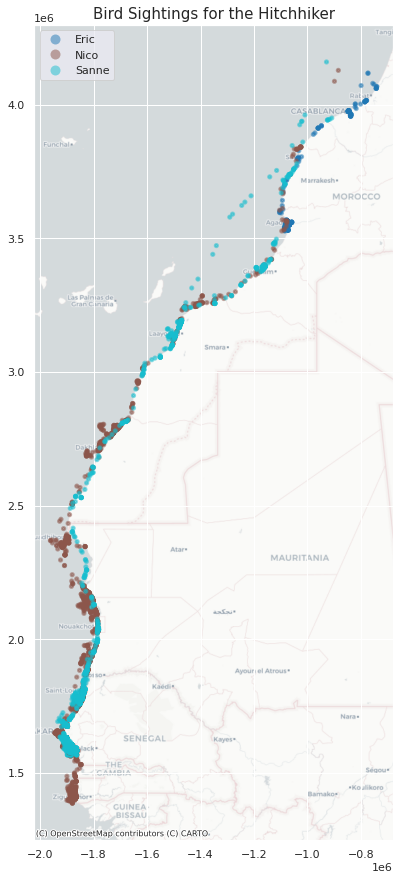

In [ ]:
# Designate the right coordinate system (maps can be drawn differently)
crs = 'EPSG:4326'

# Takes the lat and long from our bird sightings, puts into list of single points (shapely)
geometry = [Point(xy) for xy in zip(hike_df['longitude'], hike_df['latitude'])]

# Create GeoPandas dataframe (includes our hitchiker bird tracking data frame)
geo_df = gpd.GeoDataFrame(hike_df, crs = crs, geometry = geometry)

# Create figure and map axes, assign to subplot (matplotlib)
fig, ax = plt.subplots(figsize=(15, 15))

# Specify hitchhiker map coordinates and add more formatting
map_hike = geo_df.to_crs('EPSG:3857').plot(column='bird_name', linewidth=2, ax=ax, alpha=0.5, legend=True, markersize=10)
ctx.add_basemap(map_hike, source=ctx.providers.CartoDB.Positron)

# Add title to map
plt.title('Bird Sightings for the Hitchhiker', fontsize=15)


In [ ]:
# Sort for top 10 lowest altitude bird sightings
lowest_altitude_df = hike_df.sort_values(by='altitude', ascending=True).iloc[:10:]
lowest_altitude_df.head(10)

,date_time,altitude,latitude,longitude,country,speed,bird_name,geometry
8991,1/29/2014 6:09,-668,30.4436,-9.65274,MOROCCO,3.722486,Eric,POINT (-9.65274 30.44360)
9472,3/8/2014 7:57,-580,30.4391,-9.64732,MOROCCO,1.155206,Eric,POINT (-9.64732 30.43910)
9003,1/30/2014 5:14,-576,30.4423,-9.65110,MOROCCO,2.280088,Eric,POINT (-9.65110 30.44230)
9062,2/4/2014 5:34,-569,30.4372,-9.65085,MOROCCO,3.358943,Eric,POINT (-9.65085 30.43720)
6487,12/31/2013 11:20,-561,14.1355,-16.80950,SENEGAL,1.160689,Sanne,POINT (-16.80950 14.13550)
5954,11/17/2013 5:26,-522,14.1005,-16.78740,SENEGAL,5.736794,Sanne,POINT (-16.78740 14.10050)
3306,12/3/2013 7:47,-469,24.2132,-15.45220,MAURITANIA,2.258871,Nico,POINT (-15.45220 24.21320)
8330,12/15/2013 8:26,-469,30.4850,-9.67342,MOROCCO,0.792275,Eric,POINT (-9.67342 30.48500)
9133,2/9/2014 8:48,-452,30.4318,-9.64231,MOROCCO,0.988585,Eric,POINT (-9.64231 30.43180)
6672,1/17/2014 11:03,-446,14.1337,-16.81480,SENEGAL,3.827806,Sanne,POINT (-16.81480 14.13370)


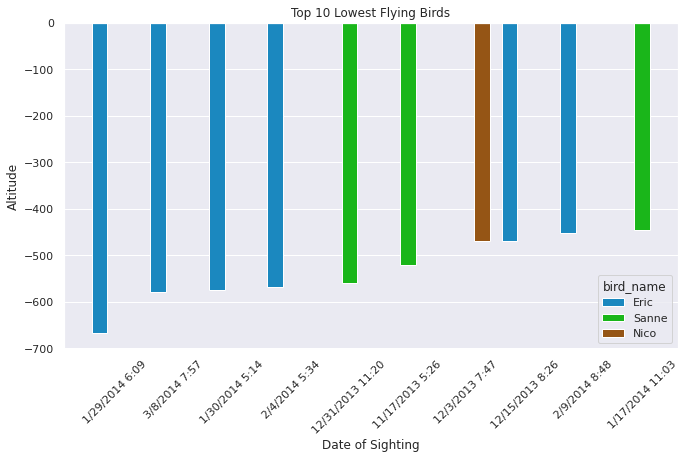

In [ ]:
# Create custom colors
bird_colors = ['#0091da', '#00d000', '#aa5500']
# Set color palette
custom_colors = sns.color_palette(bird_colors, 3)
# Adjust width/length of graph
sns.set(rc={"figure.figsize":(11, 6)}) 

# Plot scatterplot
# x are the column values
# y are the row values
# data is our dataframe
# hue is the column you want to see color in, e.g. we want our bird names to be different colors
# ci removes little error marks that appear by default (don't worry about this)
ax = sns.barplot(x='date_time', y='altitude', data=lowest_altitude_df, hue='bird_name', palette=custom_colors, ci=None)

# Customize axes and title
ax.set_title('Top 10 Lowest Flying Birds')
ax.set_xlabel('Date of Sighting')
ax.set_ylabel('Altitude')
# Adjust angle of x-axis labels to be more readable
plt.xticks(rotation=45)

# Adds a margin around the bar plot
plt.margins(0.05)
# Show the plot
plt.show()

**Where are the lowest bird sightings on the map?**

Now that we have the dataset filtered to include the 10 lowest flying birds, let's see where these sightings are and when (date) on a map.

Text(0.5, 1.0, 'Lowest Altitude Bird Sightings')

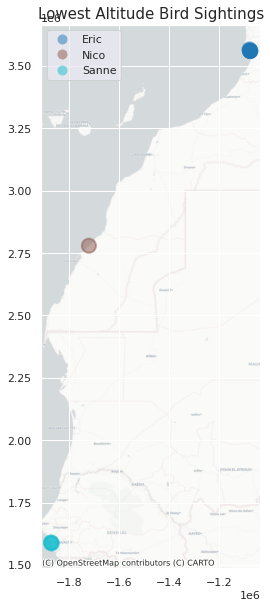

In [ ]:
# Takes the lat and long from our bird sightings, puts into list of single points (shapefly)
geometry = [Point(xy) for xy in zip(lowest_altitude_df['longitude'], lowest_altitude_df['latitude'])]

# Create GeoPandas dataframe (includes our hitchhiker bird tracking data frame)
geo_df_hike = gpd.GeoDataFrame(lowest_altitude_df, crs = crs, geometry = geometry)

# Create figure and map axes, assign to subplot (matplotlib)
fig, ax = plt.subplots(figsize=(10, 10))

# Specify France map coordinates and add more formatting
map_hike = geo_df_hike.to_crs('EPSG:3857').plot(column='bird_name', linewidth=2, ax=ax, alpha=0.5, legend=True, markersize=200)
ctx.add_basemap(map_hike, source=ctx.providers.CartoDB.Positron)

# Add title to map
plt.title('Lowest Altitude Bird Sightings', fontsize=15)

Since this map is not interactive, let's save this map as a GeoJSON file and view it in https://geojson.in/.

In [ ]:
# Write to file 
geo_df_hike.to_file("bird_tracker_hike.geojson", driver='GeoJSON')

Great! Now tourists who choose the Hitchhiker package know which areas they should travel to for the best bird watching.